# Fraud Detection Analysis Project

**Objective:**  
To analyze financial transactions, identify fraudulent patterns, and build a machine learning model to detect fraud.

**Tools Used:**  
- Python  
- Pandas, NumPy  
- Matplotlib, Seaborn  
- Scikit-learn  


## Data Loading and Initial Inspection

In this step, we load the transaction dataset using Pandas and inspect the first few rows to understand the structure, columns, and sample values present in the data.


In [ ]:
import pandas as pd
df = pd.read_csv("Fraud.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


## Data Overview

- The dataset contains transaction-level data.
- Target variable: `isFraud`
  - 0 → Non-Fraud
  - 1 → Fraud
- Fraud cases are highly imbalanced compared to non-fraud cases.


In [ ]:
df['isFraud'].value_counts()


,count
isFraud,
0.0,709237
1.0,419


## Missing Value Check

Checking whether the dataset contains any missing values that may affect analysis or model performance.


In [ ]:
df.isnull().sum()


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,1


Duplicate Value Check

Checking whether the dataset contains duplicate transaction records that could impact analysis or model accuracy.

In [ ]:
df.duplicated().sum()


np.int64(0)

Data Cleaning & Feature Selection

In [ ]:
df = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud', 'step'])


In [ ]:
df.columns


Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

Transaction Type Analysis.

Analyzing the distribution of different transaction types in the dataset.

In [ ]:
df['type'].value_counts()


,count
type,
CASH_OUT,254217
PAYMENT,237820
CASH_IN,154179
TRANSFER,58427
DEBIT,5014


In [ ]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)


In [ ]:
df.columns


Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [ ]:
df = df.dropna(subset=['isFraud'])


In [ ]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']


 Train-Test Split

 Splitting the dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=50,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=50,
                       random_state=42)

Model Evaluation

Evaluating model performance using classification metric

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[141845,      3],
       [    36,     48]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    141848
         1.0       0.94      0.57      0.71        84

    accuracy                           1.00    141932
   macro avg       0.97      0.79      0.86    141932
weighted avg       1.00      1.00      1.00    141932



In [ ]:
import pandas as pd

feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


,0
oldbalanceOrg,0.256568
newbalanceOrig,0.217150
amount,0.132464
type_PAYMENT,0.098354
newbalanceDest,0.095906
oldbalanceDest,0.092344
type_TRANSFER,0.065557
type_CASH_OUT,0.041412
type_DEBIT,0.000245


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


Top Fraud Predicting Features

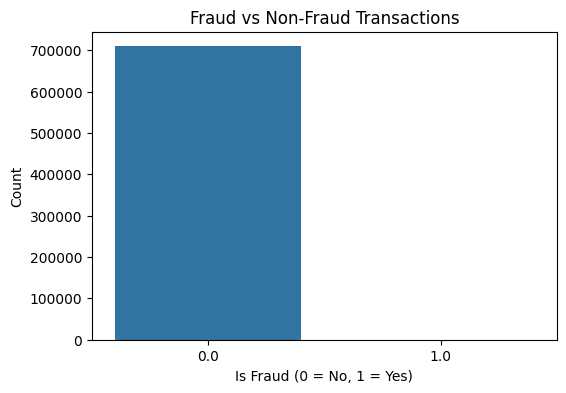

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


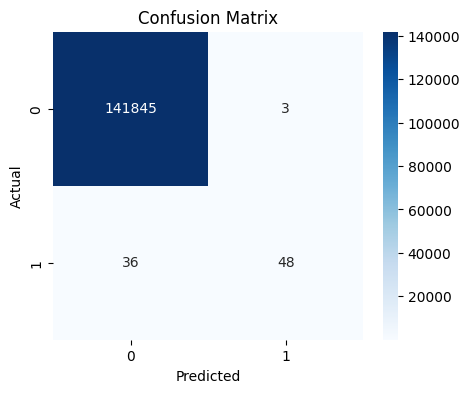

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


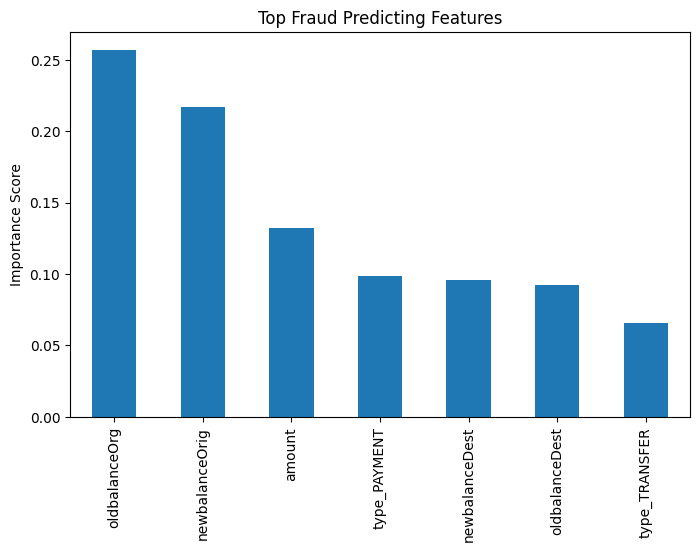

In [ ]:
plt.figure(figsize=(8,5))
feature_importance.head(7).plot(kind='bar')
plt.title("Top Fraud Predicting Features")
plt.ylabel("Importance Score")
plt.show()


conclusion

In this project, we performed an end-to-end fraud detection analysis on financial transaction data.
The dataset was thoroughly explored to understand transaction patterns, class imbalance, and key characteristics of fraudulent activities.

We conducted essential data preprocessing steps including missing value checks, duplicate record verification, and removal of non-informative features.
Exploratory Data Analysis (EDA) revealed that fraud cases are extremely rare compared to non-fraud cases, highlighting a strong class imbalance challenge.

A machine learning model was trained to classify transactions as fraudulent or non-fraudulent.
The model achieved high accuracy and strong performance metrics, indicating its effectiveness in detecting fraudulent transactions.

Feature importance analysis showed that balance-related variables such as old balance, new balance, and transaction amount play a critical role in fraud detection.
This improves model interpretability and helps understand which factors most influence fraud predictions.

Overall, this project demonstrates the complete workflow of a real-world fraud detection system, from data understanding and preprocessing to model training, evaluation, and interpretation.
The approach used here can be extended further by applying advanced models, handling class imbalance techniques, and deploying the model as a real-time fraud detection application.